In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 10 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=53cb12e4d9273d86108426d1fac5c5c048e4c298b13ac79acd1675ab2dcc5348
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
#Import required Python libraries
import cv2
import face_recognition
import os
import glob as gb

import base64
import html
import io
import time

from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np

import cv2

from google.colab.patches import cv2_imshow
from IPython.display import Image

In [ ]:
#Start webcam on google colab 
#take image and save it on your drive
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Enter your name:
elon_musk


<IPython.core.display.Javascript object>

Saved to elon_musk.jpg


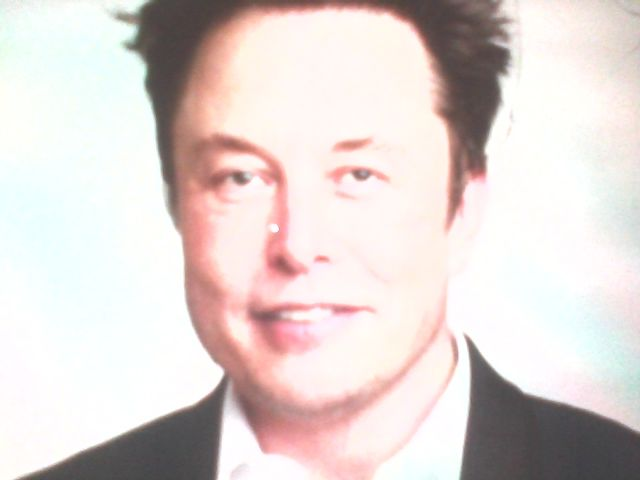

In [ ]:
#Click 'Capture' to take photo using your webcam.

try:
  print('Enter your name:')
  name = input()
  filename = take_photo(name+".jpg")
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
#Start webcam on google colab - video
def start_input():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 512, 512);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 512; //video.videoWidth;
      captureCanvas.height = 512; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function takePhoto(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def take_photo_2(label, img_data):
  data = eval_js('takePhoto("{}", "{}")'.format(label, img_data))
  return data

In [ ]:
# convert JavaScript object(contain image from webcam) to image array (image array RGB size 512 x 512 from webcam)
from PIL import Image
def js_reply_to_image(js_reply):
    jpeg_bytes = base64.b64decode(js_reply['img'].split(',')[1])
    image_PIL = Image.open(io.BytesIO(jpeg_bytes))
    image_array = np.array(image_PIL)

    return image_array

In [ ]:
# face recognition
#images path
known_images_path = "/content/"

# grab all images in known directory
# the list of data (i.e., known images) and name images
known_images = []
known_names = []

#Open known Folder
#now let's check the known folder to have a look to its content
extension = ('*.jpg')
for name in  gb.glob(extension) :
  file_list = []
  file_list.append(str(known_images_path+name))
  # loop over the image paths
  for imagePath in file_list:
    #load image
    image = face_recognition.load_image_file(imagePath)
    #encoding contains a universal 'encoding' of the facial features that can be compared to any other picture of a face!
    encoding = face_recognition.face_encodings(image)[0] # we use [0] if we just have one person in the image
    known_images.append(encoding)
    known_names.append(os.path.splitext(name)[0])


In [ ]:


print(known_names)

['elon_musk']


<IPython.core.display.Javascript object>

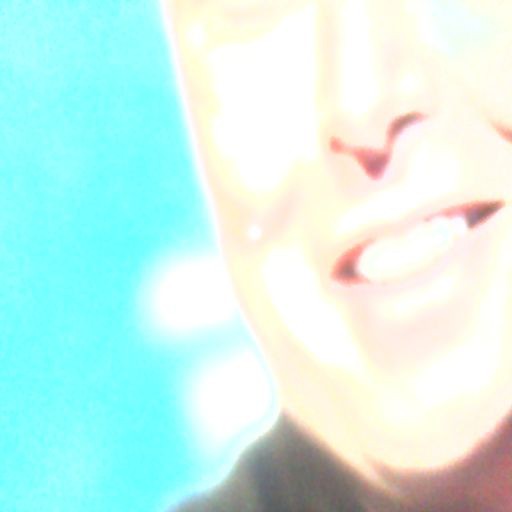

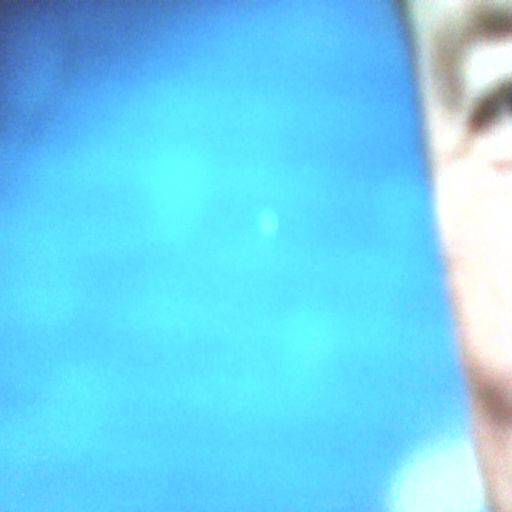

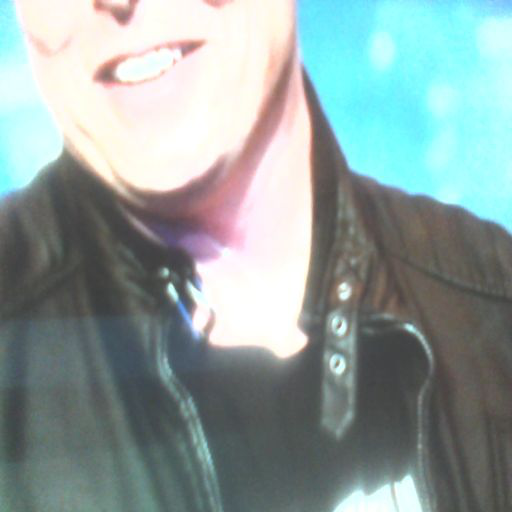

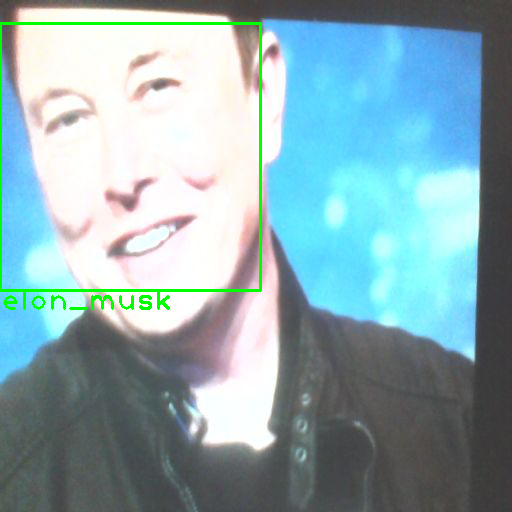

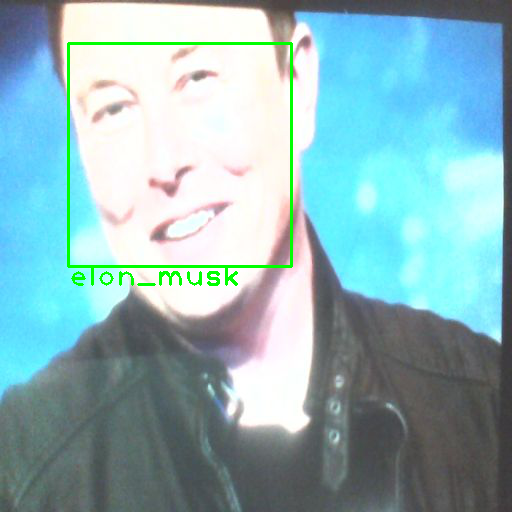

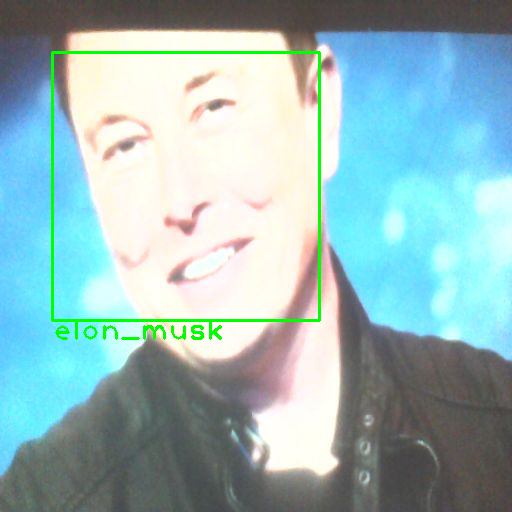

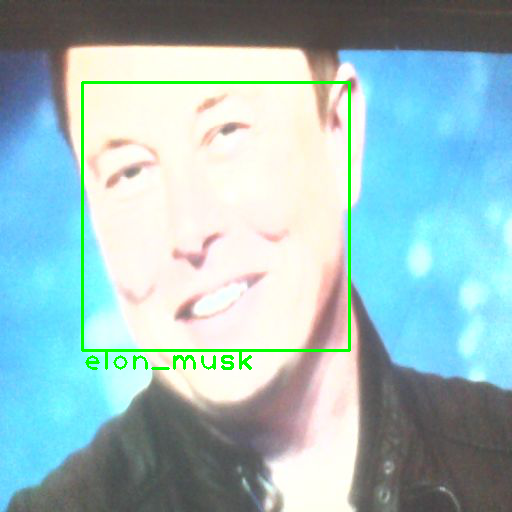

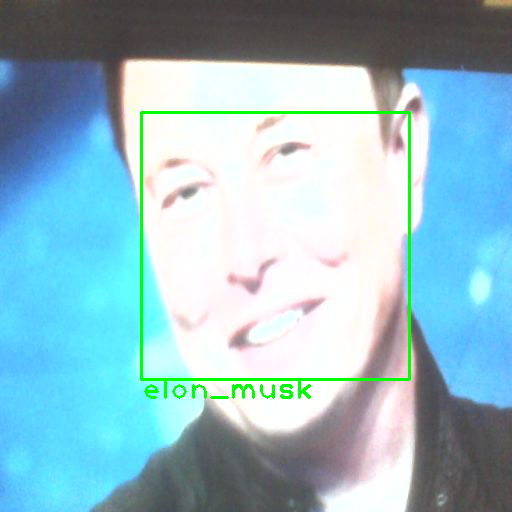

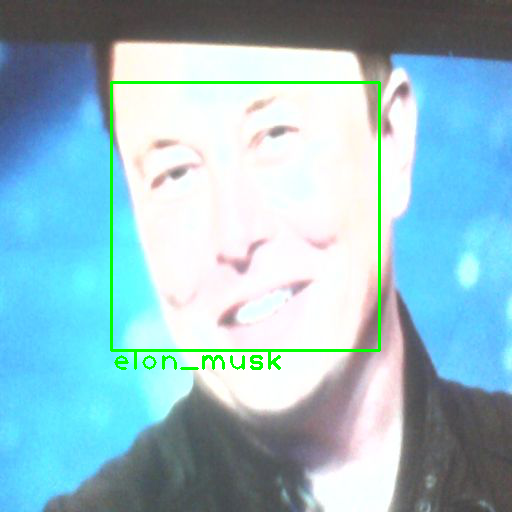

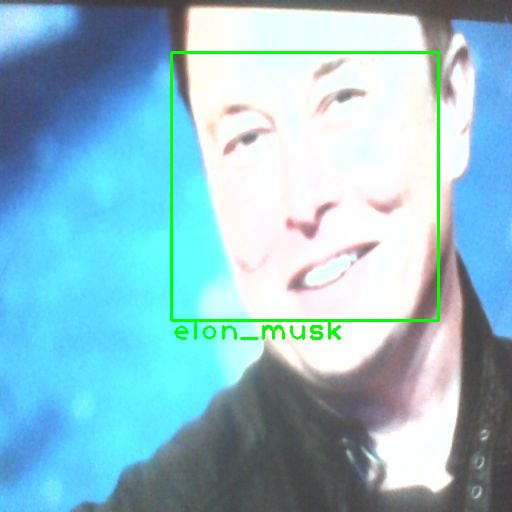

In [17]:
#main
start_input()
label_html = 'Capturing...'
img_data = ''
count = 0 
while True:
    js_reply = take_photo_2(label_html, img_data)
    if not js_reply:
        break
    image = js_reply_to_image(js_reply)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # top, right, bottom, left
    faces = face_recognition.face_locations(image)
    for face in faces: 
      top, right, bottom, left = face
      
      face_code = face_recognition.face_encodings(image, [face])[0]

      results = face_recognition.compare_faces(known_images, face_code, tolerance=0.6)
      if any(results):
          name = known_names[results.index(True)]
          cv2.rectangle(image, (left, top), (right, bottom),(0,255,0), 2)
          cv2.putText(image, name, (left, bottom + 20), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 2)
      else:
          name = 'unknown'
          cv2.rectangle(image, (left, top), (right, bottom),(0,0,255), 2)
          cv2.putText(image, name, (left, bottom + 20), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 2)

    cv2_imshow(image)
    